# Using a random forest to select important features for regression

In [4]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

In [5]:
data = skd.load_boston()

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

In [6]:
reg = ske.RandomForestRegressor()

In [7]:
X = data['data']
y = data['target']

In [8]:
reg.fit(X, y)

RandomForestRegressor()

In [9]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

Text(0.5, 1.0, 'Features importance')

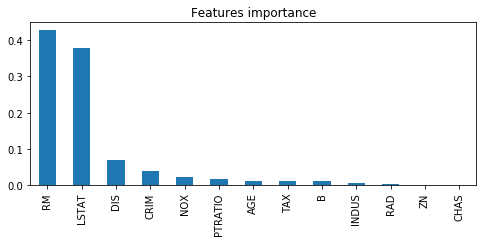

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

Text(0, 0.5, 'Value of houses (k$)')

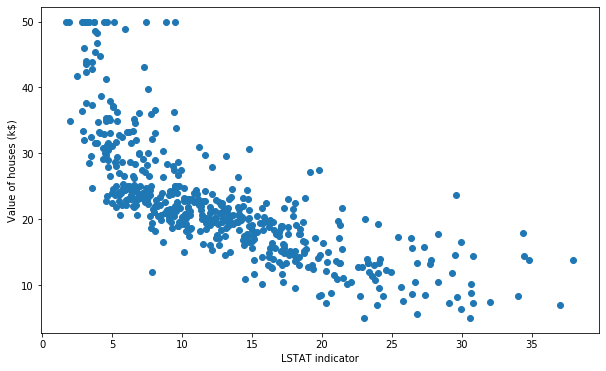

In [11]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses (k$)')

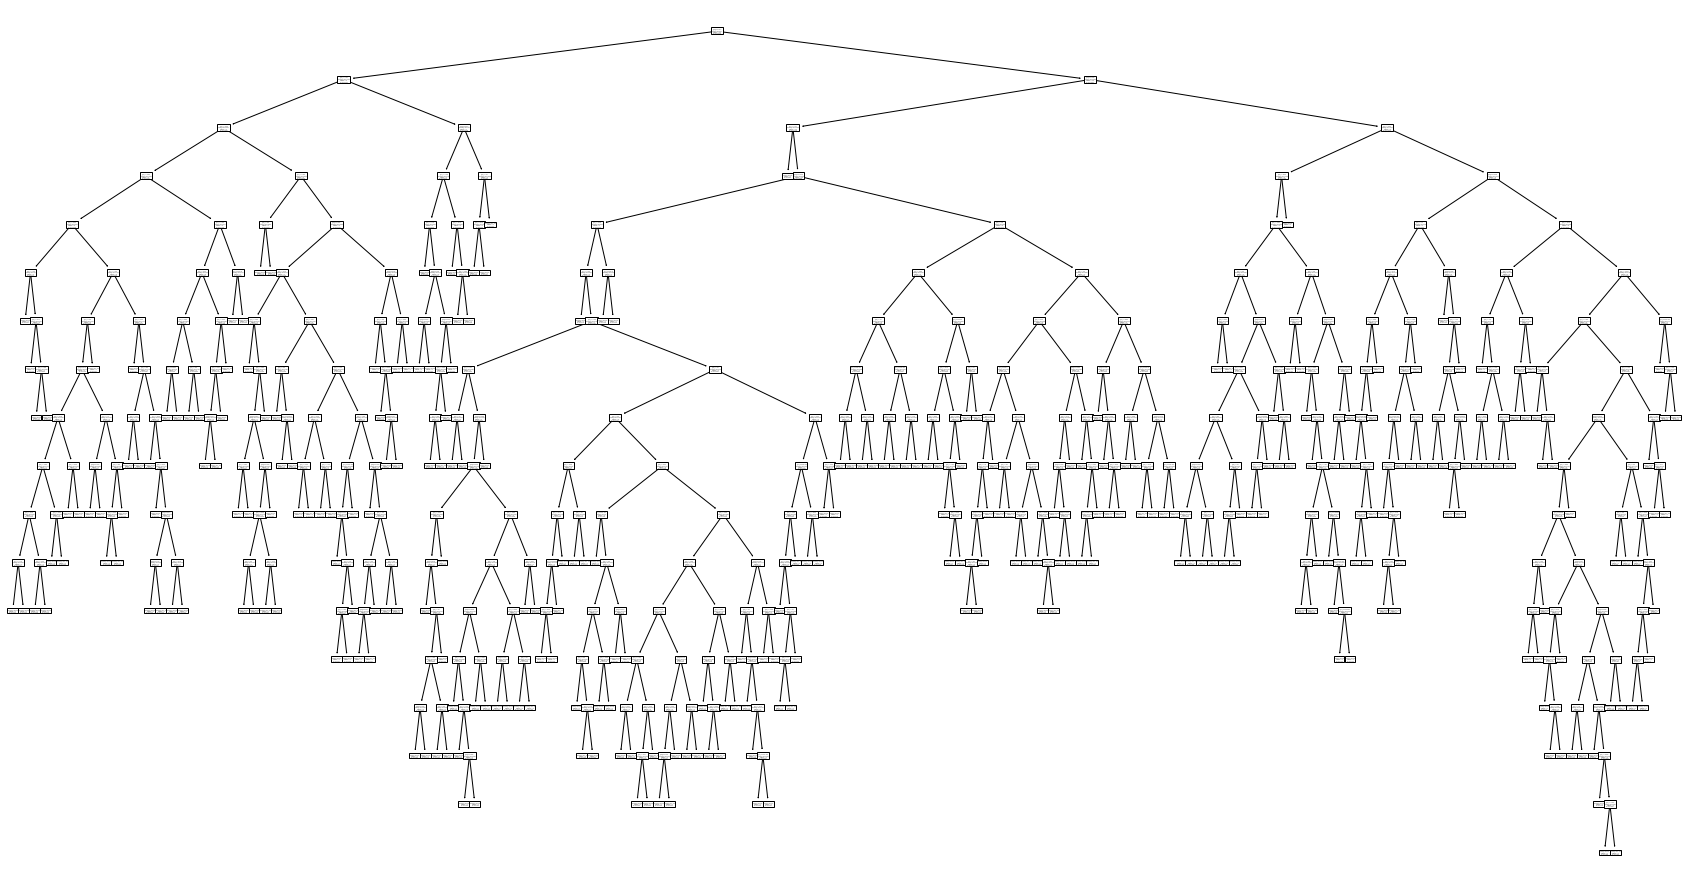

In [9]:
plt.rcParams['figure.figsize'] = 30, 16
from sklearn import tree
t = tree.plot_tree(reg.estimators_[0])


In [20]:
t

[Text(0.45520528752436645, 0.96875, 'X[12] <= 9.615\nsquared_error = 89.31\nsamples = 308\nvalue = 21.81'),
 Text(0.24141691033138402, 0.90625, 'X[5] <= 7.468\nsquared_error = 90.723\nsamples = 116\nvalue = 30.002'),
 Text(0.16275584795321638, 0.84375, 'X[7] <= 1.557\nsquared_error = 49.382\nsamples = 98\nvalue = 27.496'),
 Text(0.1596369395711501, 0.78125, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.16587475633528265, 0.78125, 'X[5] <= 6.722\nsquared_error = 24.612\nsamples = 94\nvalue = 26.342'),
 Text(0.06727582846003899, 0.71875, 'X[12] <= 5.51\nsquared_error = 8.335\nsamples = 64\nvalue = 23.613'),
 Text(0.012475633528265107, 0.65625, 'X[6] <= 18.05\nsquared_error = 4.159\nsamples = 7\nvalue = 28.292'),
 Text(0.006237816764132553, 0.59375, 'X[12] <= 4.335\nsquared_error = 0.01\nsamples = 2\nvalue = 24.7'),
 Text(0.0031189083820662767, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 24.8'),
 Text(0.00935672514619883, 0.53125, 'squared_error = 0.0\nsamples = 1\nva